## Master 1 Physics - Final project
### Détermination des points de Lagrange dans un système à deux corps

**Students** : Ronan PIEDEVACHE & Malo BRIEND

**Introduction**

Dans le cas d’un système à deux corps en interaction gravitationnelle, à l’image du système Terre-Soleil ou du système Terre-Lune, les points de Lagrange sont des points particuliers de l’espace où les champs gravitationnels des deux corps s’équilibrent. Nous comprenons tout de suite l’importance que peuvent jouer de tels points dans le domaine de l’astronomie, permettant par exemple à un satellite ou à une sonde spatiale de rester immobile par rapport aux deux corps considérés et ainsi d’accompagner leur mouvement de rotation.

**Objectifs :**
   - Modéliser les trajectoires de deux corps en interaction gravitationnelle.
   - Déterminer les positions des points de Lagrange du système ainsi modélisé.
   - Étudier la stabilité d’un de ces points.

In [1]:
# %matplotlib widget
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from scipy.optimize import fsolve

**Modélisation du système Terre-Soleil :**

Nous considérons le mouvement de la Terre dans le référentiel héliocentrique {O,x,y}, l’origine O étant le centre du Soleil et les directions Ox et Oy étant fixes et orientées arbitrairement. Dans cette configuration, le mouvement de la Terre autour du Soleil est régie par l’équation :

$$M_{T} \frac{d^2 \vec{OT}}{dt^2} = -G\frac{M_{S}~M_{T}~\vec{OT}}{\| \vec{OT}\| ^3}$$

Cette équation peut se décomposer sous la forme d’un système à 4 équations faisant intervenir les coordonnées $x$ et $y$ ainsi que les composantes de la vitesse $v_x$ et $v_y$ :

$$\frac{dx}{dt} = v_x \quad ; \quad \frac{dy}{dt} = v_y \quad ; \quad  \frac{dv_x}{dt} = -G \frac{M_{S}}{x^2 + y^2} \frac{x}{\sqrt{x^2 + y^2}} \quad ; \quad  \frac{dv_y}{dt} = -G \frac{M_{S}}{x^2 + y^2} \frac{y}{\sqrt{x^2 + y^2}}$$

Nous intégrons alors numériquement ce système à l’aide de la fonction $\textit{solve_ivp}$ :

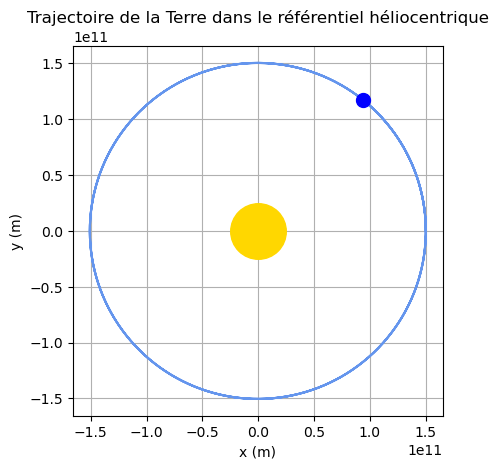

In [2]:
M_Soleil = 1.9889e30
M_Terre = 5.972e24
G=6.67e-11

# Conditions initiales
x_i = 150e9
y_i = 0
vx_i = 0
vy_i = 29.78e3
init=[x_i,y_i,vx_i,vy_i]

def orbite_terre(t,L):
    x,y,vx,vy = L[0],L[1],L[2],L[3]
    dxdt=vx
    dydt=vy
    dvxdt=-G*M_Soleil*x/((x**2+y**2)*np.sqrt(x**2+y**2))
    dvydt=-G*M_Soleil*y/((x**2+y**2)*np.sqrt(x**2+y**2))
    return dxdt,dydt,dvxdt,dvydt

# Paramètres temporels
tmin = 0
tmax = 1e8
t = (tmin,tmax)

sol = solve_ivp(orbite_terre,t,init,max_step=100000)
x_terre=sol.y[0]
y_terre=sol.y[1]
vx_terre=sol.y[2]
vy_terre=sol.y[3]

plt.close('all')
plt.figure(1)
plt.plot(x_terre,y_terre,color='cornflowerblue')
plt.plot(0,0,marker='o',markersize='40',color='gold',linewidth=0.5)
plt.plot(x_terre[-1],y_terre[-1],marker='o',markersize='10',color='blue')
plt.gca().set_aspect('equal')
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.title('Trajectoire de la Terre dans le référentiel héliocentrique')
plt.grid(True)
plt.show()

Le mouvement de la Terre autour du Soleil apparaît alors circulaire et uniforme. En conséquence, nous ne considérerons par la suite que des mouvements circulaires uniformes.

**Points de Lagrange du système :**

Pour déterminer les positions des points de Lagrange d’un système à deux corps comme celui modélisé précédemment, il est nécessaire de changer de référentiel. En effet, les points de Lagrange représentant des points de l’espace où les deux forces gravitationnelles s’équilibrent avec la force centrifuge due à la rotation du système, cela nous impose d’utiliser une configuration prenant en compte cette rotation.

Nous considérons alors un système de deux corps de masses $M_1$ et $M_2$ en mouvement circulaire uniforme autour du centre de masse $G$ du système. En notant $r_1$ et $r_2$ les distances de ces corps à $G$, nous avons par définition du centre de masse : $r_1M_1$ = $r_2M_2$. L’axe $M_1M_2$ qui passe par $G$ tourne à une vitesse angulaire $\omega$ constante donnée par la loi des aires de Kepler :

$$(r_1+r_2)^3 \omega^2 = G (M_1 + M_2)$$

Soit, en utilisant la relation du centre de masse :

$$r_1 \omega^2 = GM_2 (r_1+r_2)^2 \quad \& \quad r_2 \omega^2 = GM_1 (r_1+r_2)^2$$

L’objectif est alors d’introduire un troisième corps de masse négligeable par rapport aux deux autres corps et d’étudier son mouvement dans le référentiel tournant {G,x,y} décrit ci-dessus, dont les directions Gx et Gy sont respectivement parallèles et perpendiculaires à l’axe $M_1M_2$ reliant les deux corps.
- la position du corps de masse $M_1$ est notée $\vec{r_1} = x_1 \vec{u_x} + y_1 \vec{u_y}$ avec $x_1 = r_1$ et $y_1 = 0$
- la position du corps de masse $M_2$ est notée $\vec{r_2} = x_2 \vec{u_x} + y_2 \vec{u_y}$ avec $x_2 =- r_2$ et $y_1 = 0$
- la position du troisième corps est notée $\vec{r} = x \vec{u_x} + y \vec{u_y}$

Les points de Lagrange correspondant aux points d’équilibres du système dans le référentiel tournant, c’est-à-dire des points où les forces en présence (forces gravitationnelles et forces d’inertie) s’annulent, nous commençons par étudier les potentiels dont ces forces dérivent :
- un potentiel gravitationnel lié à la masse $M_1$ : $V_{grav,1}=-G \frac{M_1}{r}$
- un potentiel gravitationnel lié à la masse $M_2$ : $V_{grav,2}=-G \frac{M_2}{r}$
- un potentiel centrifuge lié à la rotation du système : $V_{cent}=-\frac{1}{2}r^2 \omega^2$

Le potentiel total vu par le troisième corps est alors donné par :
$$V(\vec{r}) = V_{grav,1}(\vec{r}) + V_{grav,2}(\vec{r}) + V_{cent}(\vec{r}) = -G \frac{M_1}{\| \vec{r} - \vec{r_1} \|} -G \frac{M_2}{\| \vec{r} - \vec{r_2} \|} - \frac{1}{2} \| \vec{r} \|^2 \omega^2$$

En définissant le rapport des masses/positions des deux corps $\varepsilon = \frac{M_1}{M_2} = \frac{r_2}{r_1}$ et en reprenant l’expression de la vitesse angulaire $\omega$, nous obtenons :
$$V(\vec{r}) = -G \frac{\varepsilon M_2}{\| \vec{r} - \vec{r_1} \|} -G \frac{M_2}{\| \vec{r} - \vec{r_2} \|} - \frac{1}{2} \frac{G M_2}{r_1(r_1+r_2)^2}$$

Nous introduisons ensuite une longueur caractéristique L pour adimensionner le potentiel V :
$$U(\vec{r}) = \frac{V(\vec{r}) L}{G M_2} = - \frac{L \varepsilon}{\| \vec{r} - \vec{r_1} \|} - \frac{L}{\| \vec{r} - \vec{r_2} \|} - \frac{1}{2} \frac{\| \vec{r} \|^2 L}{r_1(r_1+r_2)^2}$$

Nous définissons enfin des vecteurs positions adimensionnés $\vec{R} = \frac{\vec{r}}{L} = X \vec{u_x} + Y \vec{u_y}$ pour écrire :
$$U(\vec{R}) = - \frac{\varepsilon}{\| \vec{R} - \vec{R_1} \|} - \frac{1}{\| \vec{R} - \vec{R_2} \|} - \frac{1}{2} \frac{\| \vec{R} \|^2}{R_1(R_1+R_2)^2}$$

Soit en fonction des coordonnées adimensionnées $X$ et $Y$ et en posant $\Omega^2 = \frac{1}{R_1(R_1+R_2)^2}$ :
$$U = -\frac{\varepsilon}{\sqrt{(X-X_{1})^2+(Y-Y_{1})^2}} - \frac{1}{\sqrt{(X-X_{2})^2+(Y-Y_{2})^2}} -\frac{1}{2} \Omega^2 (X^2 + Y^2)$$

Nous obtenons au final un potentiel adimensionné qui dépend des coordonnées $X$ et $Y$ du troisième corps dans le référentiel tournant et d’un unique paramètre $\varepsilon$.

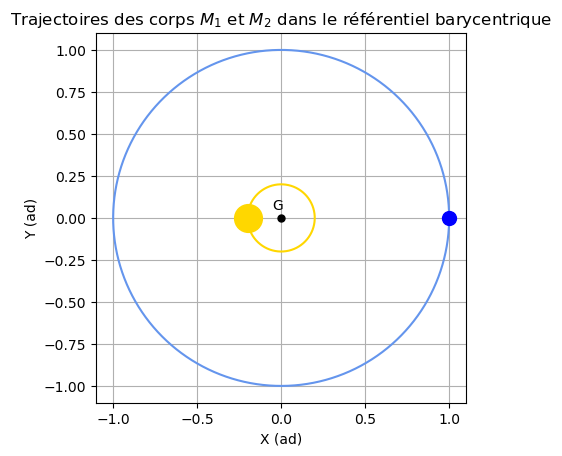

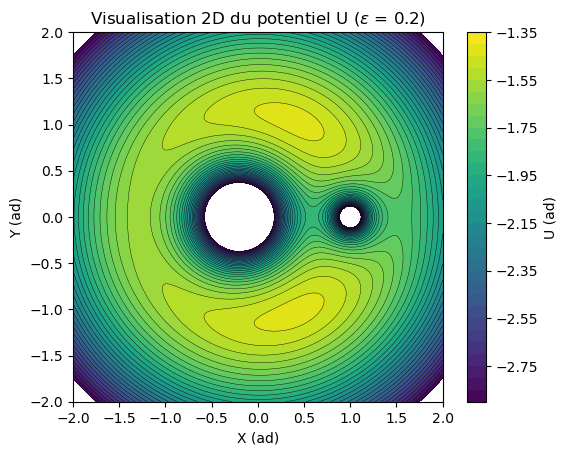

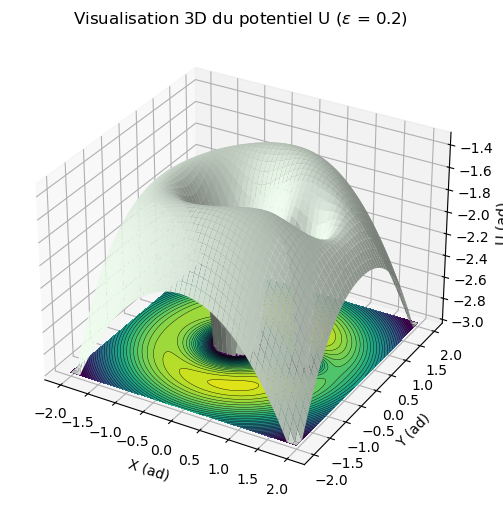

In [3]:
# Paramètres d'adimensionnement :
epsilon = 0.2
X1_i,Y1_i = 1,0
R1 = np.sqrt(X1_i**2+Y1_i**2)
X2_i,Y2_i = -epsilon*X1_i,0
R2 = np.sqrt(X2_i**2+Y2_i**2)
Omega = np.sqrt(1/(R1*(R1+R2)**2)) 

T=np.linspace(0,2*np.pi/Omega,1000)
X1,Y1 = X1_i*np.cos(Omega*T),X1_i*np.sin(Omega*T)
X2,Y2 = X2_i*np.cos(Omega*T),X2_i*np.sin(Omega*T)

N = 1000
X,Y = np.meshgrid(np.linspace(-2,2,N),np.linspace(-2,2,N))
U = -epsilon/np.sqrt((X-X1_i)**2+(Y-Y1_i)**2) - 1/np.sqrt((X-X2_i)**2+(Y-Y2_i)**2) - 0.5*Omega**2*(X**2+Y**2)
U = np.clip(U,-3,0)
niveaux = np.arange(-2.9,-1.3,0.05) 

plt.close('all')

# Trajectoires référentiel barycentrique :
plt.figure(2)
plt.gca().set_aspect('equal')
plt.plot(X1,Y1,color='cornflowerblue')
plt.plot(X1[-1],Y1[-1],marker='o',color='blue',markersize=10)
plt.plot(X2,Y2,color='gold')
plt.plot(X2[-1],Y2[-1],marker='o',color='gold',markersize=20)
plt.plot(0,0,marker="o", color="black",markersize=5)
plt.annotate("G",(0,0),(-0.05,0.05),size=10, color="black")
plt.xlabel('X (ad)')
plt.ylabel('Y (ad)')
plt.title('Trajectoires des corps $M_1$ et $M_2$ dans le référentiel barycentrique')
plt.grid(True)
plt.show()

# Tracé 2D :
plt.figure(3)
plt.gca().set_aspect('equal')
plt.contour(X,Y,U,levels=niveaux,colors='black',linestyles='solid',linewidths=0.3)
plt.contourf(X,Y,U,levels=niveaux)
plt.colorbar(label='U (ad)')
plt.xlabel('X (ad)')
plt.ylabel('Y (ad)')
plt.title('Visualisation 2D du potentiel U ($\epsilon$ = {})'.format(epsilon))
plt.show()

# Tracé 3D :
plt.figure(4, figsize=(6,6))
ax = plt.axes(projection='3d')
ax.plot_surface(X,Y,U,color='honeydew')
ax.contour(X,Y,U,levels=niveaux,colors='black',linestyles='solid',linewidths=0.3,offset=-3)
ax.contourf(X,Y,U,levels=niveaux,extend='both',offset=-3)
ax.set_xlabel('X (ad)')
ax.set_ylabel('Y (ad)')
ax.set_zlabel('U (ad)')
ax.set_title('Visualisation 3D du potentiel U ($\epsilon$ = {})'.format(epsilon))
plt.show()

Le tracé de la courbe de potentiel nous permet de bien distinguer deux puits de potentiel au niveau des corps $M_1$ et $M_2$. Une projection sur le plan (X,Y) permet par ailleurs d’identifier certaines régions où $U$ semble présenter localement une valeur maximale ou un changement de courbure, c’est-à-dire les régions des points de Lagrange (extrema locaux et points d’inflexions du potentiel).

**Détermination des 5 points de Lagrange :**

Pour déterminer plus précisément les positions des 5 points de Lagrange, nous pouvons nous baser sur leurs propriétés :
- les points $L_1$, $L_2$ et $L_3$ sont des points d’inflexion du potentiel $U$ et sont tous les trois situés sur l’axe $M_1M_2$, respectivement entre $M_1$ et $M_2$, au-delà de $M_1$ et au-delà de $M_2$. Nous pouvons alors chercher les points le long de cet axe pour lesquels la résultante des forces est nulle, c’est-à-dire les valeurs de $r$ telles que :
$$-G \frac{(r-r_1)M_1}{|r_1-r|^3} - G\frac{(r+r_2)M_2}{|r+r_2|^3} + r \omega^2 = 0$$

Ce qui donne dans notre modèle adimensionné :
$$\frac{\varepsilon (R_1-R)}{|R_1-R|^3} -\frac{R_2+R}{|R_2+R|^3} + R \Omega^2 = 0$$

Les racines de cette fonction sont calculées numériquement à l’aide de la fonction $\textit{fsolve()}$ du module $\textit{optimize}$ de la bibliothèque $\textit{scipy}$. <br>

- les points $L_4$ et $L_5$ sont des maxima locaux du potentiel $U$ situés de part et d’autre de l’axe $M_1M_2$. Leur particularité est qu’ils forment chacun un triangle équilatéral avec les positions de $M_1$ et $M_2$ :
$$X_{L_4} = X_{L_5} = - R_2 + \frac{R_1 + R_2}{2} \quad \& \quad Y_{L_4} = Y_{L_5} = (R_1 + R_2) \times \sin(60 ^\circ)$$

C:\Users\Utilisateur\anaconda3\lib\site-packages\numpy\ma\core.py:2826: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  _data = np.array(data, dtype=dtype, copy=copy,


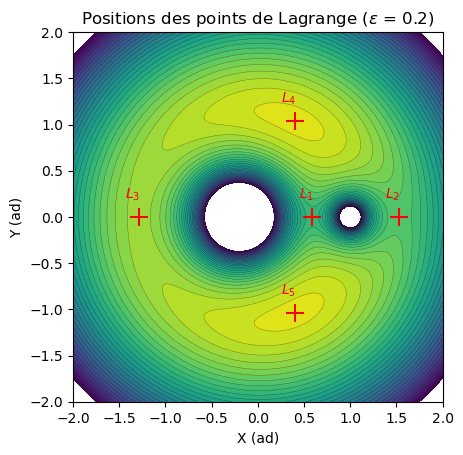

In [4]:
def somme_force(R):
    return epsilon*(R1-R)/abs(R1-R)**3 - (R2+R)/abs(R2+R)**3 + R*Omega**2

X_lagrange = [fsolve(somme_force,R1/2),fsolve(somme_force,R1+1),fsolve(somme_force,-R1)]
Y_lagrange=[0,0,0]
X_L4 = -R2+(R1+R2)/2
Y_L4 = (R1+R2)*np.sqrt(3)/2
X_lagrange += [X_L4,X_L4]
Y_lagrange += [Y_L4,-Y_L4]

plt.close('all')
plt.figure(5)
plt.gca().set_aspect('equal')
plt.contourf(X,Y,U,levels=niveaux,cmap='viridis')
plt.contour(X,Y,U,levels=niveaux,colors='black',linestyles='solid',linewidths=0.3,alpha=0.5)
plt.scatter(X_lagrange,Y_lagrange,marker='+',s=150,color='red')  
for i in range(5):
    plt.text(X_lagrange[i]-0.15,Y_lagrange[i]+0.2,"$L_{}$".format(i+1),color='red')
plt.xlabel('X (ad)')
plt.ylabel('Y (ad)')
plt.title('Positions des points de Lagrange ($\epsilon$ = {})'.format(epsilon))
plt.show()

Nous observons bien sur la figure des points $L_1$, $L_2$ et $L_3$ alignés selon l’axe $M_1M_2$ et des points $L_4$ et $L_5$ disposés symétriquement de part et d’autre $L_1$ de l’axe $M_1M_2$.
- les positions des points $L_1$, $L_2$ et $L_3$ dépendent du rapport $\varepsilon$ entre les masses $M_1$ et $M_2$ du système : plus $\varepsilon$ est petit, c’est-à-dire plus le corps $M_2$ est massif par rapport au corps $M_1$, plus les points $L_1$ et $L_2$ se rapprochent de $M_1$ et plus $L_3$ se rapproche de $M_2$. Nous remarquons également que lorsque $\varepsilon$ tend vers 1, $L_1$ tend à être à mi-chemin de $M_1$ et $M_2$ et les distances $L_2M_1$ et $L_3M_2$ tendent à être égales.
- les positions des points $L_4$ et $L_5$ ne dépendent pas du rapport $\varepsilon$, formant toujours les sommets de deux triangles équilatéraux dont la base est la distance $M_1M_2$.

**Stabilité de la trajectoire d’un satellite au voisinage de L4 :**

Puisque nous travaillons dans un référentiel tournant et donc non galiléen, l’étude de la stabilité d’un point de Lagrange ne se réduit pas à déterminer si le potentiel présente un maximum, un minimum ou un point d’inflexion en ce point. En effet, si nous voulons étudier la dynamique d’un satellite lâché à proximité d’un point de Lagrange, il faut prendre en compte une force qui ne dérive pas d’un potentiel : la force de Coriolis. Dans notre modèle adimensionné, celle-ci est donnée par :
$$\vec{F}_{coriolis} = 2 \Omega V_Y~\vec{u_X} - 2 \Omega V_X~\vec{u_Y}$$

où $V_X$ et $V_Y$ sont les composantes de la vitesse du satellite selon $X$ et $Y$.

Considérons ainsi un satellite lâché à proximité du point $L_4$ sans vitesse initiale. Sa trajectoire dans le référentiel tournant est alors régie par le système d’équations :
$$\frac{dX}{dT} = v_X \quad ; \quad \frac{dY}{dT} = v_Y$$
$$\frac{dv_X}{dT} = -\frac{\varepsilon (X-X_1)}{\left( (X-X_1)^2 + (Y-Y_1)^2\right)^{3/2}} - \frac{(X-X_2)}{\left((X-X_2)^2 + (Y-Y_2)^2\right)^{3/2}} + \Omega^{2}X - 2 \Omega V_Y$$
$$\frac{dv_Y}{dT} = -\frac{\varepsilon (Y-Y_1)}{\left( (X-X_1)^2 + (Y-Y_1)^2\right)^{3/2}} - \frac{(Y-Y_2)}{\left((X-X_2)^2 + (Y-Y_2)^2\right)^{3/2}} + \Omega^{2}Y - 2 \Omega V_X$$

Nous résolvons alors le système à l’aide de $\textit{solve_ivp}$ pour différentes valeurs de $\varepsilon$, pour une même durée $T$ et des conditions initiales identiques.

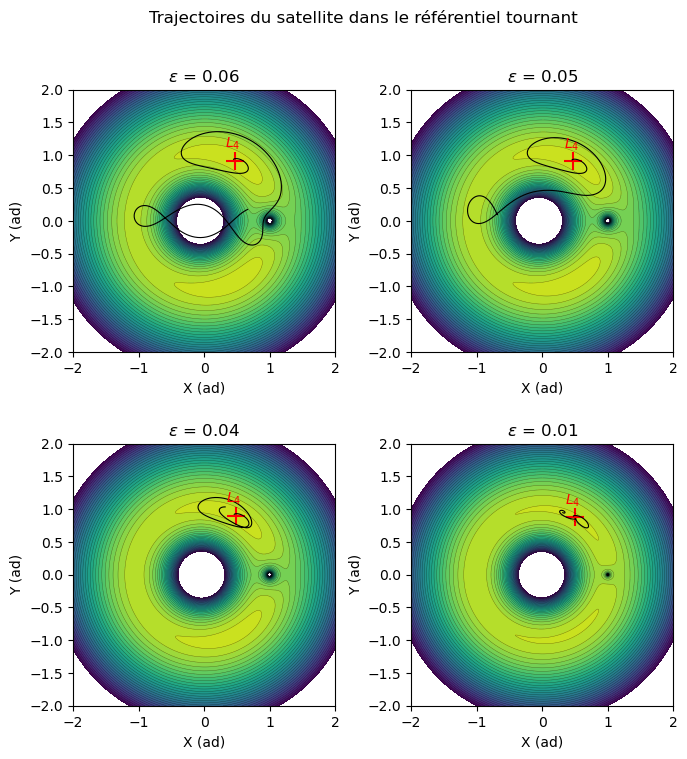

In [8]:
plt.close('all')
plt.figure(6,figsize=(8,8))

epsilon_test = [0.06,0.05,0.04,0.01]
for i in range(len(epsilon_test)):
    X1_i = 1
    Y1_i = 0
    R1 = np.sqrt(X1_i**2+Y1_i**2)
    X2_i = -epsilon_test[i]*X1_i
    Y2_i = 0
    R2 = np.sqrt(X2_i**2+Y2_i**2)
    Omega = np.sqrt(1/(R1*(R1+R2)**2)) 

    N = 1000
    X,Y = np.meshgrid(np.linspace(-2,2,N),np.linspace(-2,2,N))
    U = -epsilon_test[i]/np.sqrt((X-X1_i)**2+(Y-Y1_i)**2) - 1/np.sqrt((X-X2_i)**2+(Y-Y2_i)**2) - 0.5*Omega**2*(X**2+Y**2)
    U = np.clip(U,-3,0)
    niveaux = np.arange(-2.9,-1.3,0.05) 

    X_L4 = -R2+(R1+R2)/2
    Y_L4 = (R1+R2)*np.sqrt(3)/2


    # Définition de la trajectoire du satellite :
    def trajectoire(t,traj):
        Xtraj,Ytraj = traj[0],traj[1]
        VXtraj,VYtraj = traj[2],traj[3]
        dXdt = VXtraj
        dYdt = VYtraj
        dVXdt = - epsilon_test[i]*(Xtraj-X1_i) / ((Xtraj-X1_i)**2+(Ytraj-Y1_i)**2)**1.5\
                - (Xtraj-X2_i) / ((Xtraj-X2_i)**2+(Ytraj-Y2_i)**2)**1.5\
                + Xtraj*Omega**2 + 2*Omega*VYtraj
        dVYdt = - epsilon_test[i]*(Ytraj-Y1_i) / ((Xtraj-X1_i)**2+(Ytraj-Y1_i)**2)**1.5\
                - (Ytraj-Y2_i) / ((Xtraj-X2_i)**2+(Ytraj-Y2_i)**2)**1.5\
                + Ytraj*Omega**2 - 2*Omega*VXtraj
        return dXdt,dYdt,dVXdt,dVYdt

    # Conditions initiales :
    satellite_init=[X_L4-0.02,Y_L4+0.02,0,0]

    # Paramètres temporels :
    Tmin = 0
    Tmax = 20
    Ttraj=(Tmin,Tmax)

    # Intégration : 
    SOL = solve_ivp(trajectoire,Ttraj,satellite_init,max_step=0.01)
    Xsat,Ysat = SOL.y[0],SOL.y[1]
    
    plt.subplot(2,2,i+1)
    plt.contourf(X,Y,U,levels=niveaux,cmap='viridis')
    plt.contour(X,Y,U,levels=niveaux,colors='black',linestyles='solid',linewidths=0.3,alpha=0.5)
    plt.scatter(X_L4,Y_L4,marker='+',s=150,color='red') 
    plt.text(X_L4-0.15,Y_L4+0.2,"$L_4$",color='red')
    plt.plot(Xsat,Ysat,color='black',linewidth=0.8)
    plt.gca().set_aspect('equal')
    plt.xlabel('X (ad)')
    plt.ylabel('Y (ad)')
    plt.title('$\epsilon$ = {}'.format(epsilon_test[i]))

plt.subplots_adjust(wspace=0.2,hspace=0.35)
plt.suptitle('Trajectoires du satellite dans le référentiel tournant')
plt.show()

En testant plusieurs valeurs de $\varepsilon$, nous remarquons qu’il existe une valeur critique pour laquelle le satellite passe d’une trajectoire stable (satellite en orbite à proximité de $L_4$) à une trajectoire instable (satellite éjecté de $L_4$ en dérive dans le système). Pour les conditions initiales utilisées cidessus, ce rapport critique est d’environ $\varepsilon _c = 0.04$. Nous pouvons donc en conclure que pour certains systèmes dont le rapport de masse se rapproche de 1, un satellite ne peut pas durablement rester en orbite autour des points de Lagrange $L_4$ et $L_5$. Dans le cas des systèmes Terre-Soleil ou Terre-Lune, les rapports de masse sont suffisamment faibles (respectivement $\varepsilon _{T-S} = 3~10^{-6}$ et $\varepsilon _{T-L} = 0.012$) pour pouvoir envisager favorablement une mission autour de ces points.